# Análisis de variables a la hora de vender un chalet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
datos = pd.read_csv("chalets.csv")   # dataFrame de datos promediados a media cero
datosNP = datos.to_numpy()
print(datos)
print(datosNP)

   Promotora  DuracionHipoteca  PrecioMedio  SuperficieCocina
0          1               8.7          0.3               3.1
1          2              14.3          0.9               7.4
2          3              18.9          1.8               9.0
3          4              19.0          0.8               9.4
4          5              20.5          0.9               8.3
5          6              14.7          1.1               7.6
6          7              18.8          2.5              12.6
7          8              37.3          2.7              18.1
8          9              12.6          1.3               5.9
9         10              25.7          3.4              15.9
[[ 1.   8.7  0.3  3.1]
 [ 2.  14.3  0.9  7.4]
 [ 3.  18.9  1.8  9. ]
 [ 4.  19.   0.8  9.4]
 [ 5.  20.5  0.9  8.3]
 [ 6.  14.7  1.1  7.6]
 [ 7.  18.8  2.5 12.6]
 [ 8.  37.3  2.7 18.1]
 [ 9.  12.6  1.3  5.9]
 [10.  25.7  3.4 15.9]]


In [3]:
Promo = datosNP[:,0]
Dur_Hip = datosNP[:,1]
Pre_Med = datosNP[:,2]
Sup_Coc = datosNP[:,3]

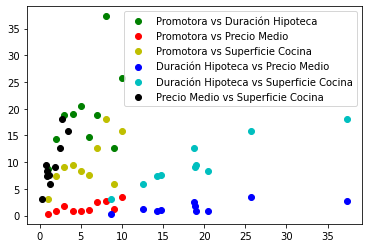

In [6]:
#Grafico de a pares las variables:
plt.scatter(Promo,Dur_Hip,c="g",label="Promotora vs Duración Hipoteca")
plt.scatter(Promo,Pre_Med,c="r",label="Promotora vs Precio Medio")
plt.scatter(Promo,Sup_Coc,c="y",label="Promotora vs Superficie Cocina")
plt.scatter(Dur_Hip,Pre_Med,c="b",label="Duración Hipoteca vs Precio Medio")
plt.scatter(Dur_Hip,Sup_Coc,c="c",label="Duración Hipoteca vs Superficie Cocina")
plt.scatter(Pre_Med,Sup_Coc,c="k",label="Precio Medio vs Superficie Cocina")
plt.legend()

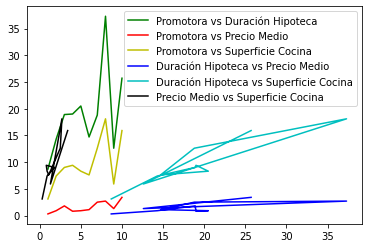

In [5]:
plt.plot(Promo,Dur_Hip,c="g",label="Promotora vs Duración Hipoteca")
plt.plot(Promo,Pre_Med,c="r",label="Promotora vs Precio Medio")
plt.plot(Promo,Sup_Coc,c="y",label="Promotora vs Superficie Cocina")
plt.plot(Dur_Hip,Pre_Med,c="b",label="Duración Hipoteca vs Precio Medio")
plt.plot(Dur_Hip,Sup_Coc,c="c",label="Duración Hipoteca vs Superficie Cocina")
plt.plot(Pre_Med,Sup_Coc,c="k",label="Precio Medio vs Superficie Cocina")
plt.legend()

Se puede apreciar cierta correlación entre estos conjuntos de datos, ya que se pueden trazar rectas que los describan parcialmente.

In [8]:
# Calculo matriz de covarianzas
X = np.array(datosNP)
print(X)
Xest = X - np.mean(X,axis=0)
A = np.cov(np.transpose(Xest), bias = 1)
print(A)
print(Xest)

[[ 1.   8.7  0.3  3.1]
 [ 2.  14.3  0.9  7.4]
 [ 3.  18.9  1.8  9. ]
 [ 4.  19.   0.8  9.4]
 [ 5.  20.5  0.9  8.3]
 [ 6.  14.7  1.1  7.6]
 [ 7.  18.8  2.5 12.6]
 [ 8.  37.3  2.7 18.1]
 [ 9.  12.6  1.3  5.9]
 [10.  25.7  3.4 15.9]]
[[ 8.25   11.335   2.025   7.955 ]
 [11.335  56.9685  5.1705 30.4775]
 [ 2.025   5.1705  0.8941  3.6479]
 [ 7.955  30.4775  3.6479 18.7641]]
[[ -4.5  -10.35  -1.27  -6.63]
 [ -3.5   -4.75  -0.67  -2.33]
 [ -2.5   -0.15   0.23  -0.73]
 [ -1.5   -0.05  -0.77  -0.33]
 [ -0.5    1.45  -0.67  -1.43]
 [  0.5   -4.35  -0.47  -2.13]
 [  1.5   -0.25   0.93   2.87]
 [  2.5   18.25   1.13   8.37]
 [  3.5   -6.45  -0.27  -3.83]
 [  4.5    6.65   1.83   6.17]]


Resulta razonable hacer un análisis de componentes principales, ya que se puede reducir el número de variables de 4 a al menos una, por lo que elegiré las más representativas.

In [9]:
# Busco la primera componente principal
auto = np.linalg.eig(A)
autovalores = auto[0]
print(autovalores)
autovectores = auto[1]
U=autovectores #Veo que están ordenados de mayor a menor, entonces U es la matriz de autovectores.

print(U)

[77.1758364   6.13104476  1.49201908  0.07779976]
[[-0.19769591 -0.90573104  0.3695674   0.06314711]
 [-0.85212743  0.33861092  0.38912278 -0.08834567]
 [-0.0858126  -0.15623688 -0.26698382 -0.94707226]
 [-0.47689766 -0.20145463 -0.80045177  0.30209537]]


In [10]:
Z = Xest@U
print("Matriz Z=\n", Z)
print("")
z1 = Z[:,0]
print("Primera componente principal: \n", z1)
z2 = Z[:,1]
print("Segunda componente principal: \n", z2)
z3 = Z[:,2]
print("Tercera componente principal:\n ", z3)
z4 = Z[:,3]
print("Cuarta componente principal:\n ", z4)

Matriz Z=
 [[ 1.29799639e+01  2.10523166e+00 -4.44093200e-02 -1.69894846e-01]
 [ 5.90820693e+00  2.13572475e+00 -1.09788729e+00  1.29283251e-01]
 [ 9.50457275e-01  2.32466335e+00 -4.59363395e-01 -5.82972165e-01]
 [ 5.62602160e-01  1.52844844e+00 -1.04080604e-01  5.39250789e-01]
 [-3.97278720e-01  1.33661019e+00  1.70296953e+00  4.28672586e-02]
 [ 4.66403028e+00 -1.42329333e+00  3.22544291e-01  2.17538042e-01]
 [-1.53201400e+00 -2.16672438e+00 -2.08852114e+00  1.03043593e-01]
 [-2.01341669e+01  2.05259881e+00  1.02393612e+00  3.90589674e-03]
 [ 6.65397365e+00 -4.54034388e+00  1.92145990e+00 -1.10471307e-01]
 [-9.65577457e+00 -3.35291560e+00 -1.17664808e+00 -1.72550513e-01]]

Primera componente principal: 
 [ 12.97996391   5.90820693   0.95045727   0.56260216  -0.39727872
   4.66403028  -1.532014   -20.13416692   6.65397365  -9.65577457]
Segunda componente principal: 
 [ 2.10523166  2.13572475  2.32466335  1.52844844  1.33661019 -1.42329333
 -2.16672438  2.05259881 -4.54034388 -3.3529156

In [11]:
def CM(x,y):    # Cuadrados minimos con polyfit
    coef = np.polyfit(x,y,1)
    poli = np.poly1d(coef)
    yRL = np.polyval(poli,x)   
    print(poli)
    # R" para datos de media cero
    R2 = np.linalg.norm(yRL, 2)**2 / np.linalg.norm(y,2)**2
    print(R2)
    return(poli,R2)

In [14]:
# Veo qué porcentaje de la variabilidad total logra explicar cada componente principal:
Var = sum(autovalores)
Var_Exp_z1 = autovalores[0]/Var
print("La proporción de varianza explicada por z1 es:",Var_Exp_z1)
Var_Exp_z2 = autovalores[1]/Var
print("La proporción de varianza explicada por z2 es:",Var_Exp_z2)
Var_Exp_z3 = autovalores[2]/Var
print("La proporción de varianza explicada por z3 es:",Var_Exp_z3)
Var_Exp_z4 = autovalores[3]/Var
print("La proporción de varianza explicada por z4 es:",Var_Exp_z4)

La proporción de varianza explicada por z1 es: 0.9092699928310696
La proporción de varianza explicada por z2 es: 0.07223472117138786
La proporción de varianza explicada por z3 es: 0.017578665057750357
La proporción de varianza explicada por z4 es: 0.0009166209397920914


Como la varianza explicada por z1 es casi 1, resulta factible tomar z1 como variable que explica la correlación entre la venta de un chalet y las demás variables.